In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## 数据

In [2]:
df = pd.read_csv("../data/perceptron_toydata.txt", sep="\t", header=None)
data = df.to_numpy()
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


In [3]:
# shuffle
n, m = X.shape
np.random.seed(47)
shuffle_idx = np.random.permutation(n)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]
y_train, y_test = y_train.reshape((-1, 1)), y_test.reshape((-1, 1))

# normalizae (mean zero, unit variance)
mu, sigma = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

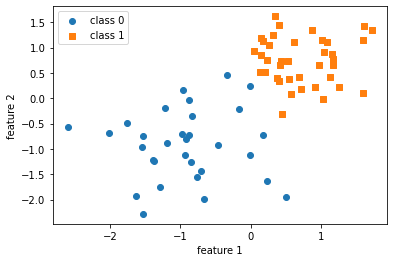

In [4]:
plt.scatter(X_train[y_train[:, 0]==0, 0], X_train[y_train[:, 0]==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train[:, 0]==1, 0], X_train[y_train[:, 0]==1, 1], label='class 1', marker='s')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 参数

In [5]:
n_features = X_train.shape[1]
n_samples = X_train.shape[0]
learning_rate = 0.001
epochs = 5000

## 网络

In [6]:
# model definition
g = tf.Graph()
with g.as_default():
    # input
    X = tf.placeholder(dtype=tf.float32, shape=[None, n_features], name="X")
    # output
    Y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name="Y")
    
    # weights
    weights = tf.Variable(tf.truncated_normal(shape=[n_features, 1]), dtype=tf.float32, name="W")
    bias = tf.Variable(tf.zeros([1]), dtype=tf.float32, name="b")
    
    # model
    pred = tf.nn.sigmoid(tf.add(tf.matmul(X, weights), bias), name="prediction")
    
    # cost
    cost = tf.reduce_mean(-(tf.reduce_sum(Y * tf.log(pred)) + (1-Y) * tf.log(1-pred)))
    
    # optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    
    # train op
    train_op = optimizer.minimize(cost)
    
    saver = tf.train.Saver(name="saver")

## 训练

In [7]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        _ = sess.run(train_op, feed_dict={X: X_train, Y: y_train})
        
        if (epoch+1) % 500 == 0:
            loss = sess.run(cost, feed_dict={X: X_train, Y: y_train})
            print("Epoch: {}/{}, loss: {}".format(epoch, epochs, loss))
    
    loss = sess.run(cost, feed_dict={X: X_test, Y: y_test})
    loss = loss * n_samples / X_test.shape[0]
    print("test loss: {}".format(loss))
    
    w, b = sess.run([weights, bias])
    print("w: {}, b: {}".format(w, b))

Epoch: 499/5000, loss: 1.6454979181289673
Epoch: 999/5000, loss: 0.9996465444564819
Epoch: 1499/5000, loss: 0.7827258110046387
Epoch: 1999/5000, loss: 0.6695297360420227
Epoch: 2499/5000, loss: 0.5978841781616211
Epoch: 2999/5000, loss: 0.5473476052284241
Epoch: 3499/5000, loss: 0.5091673135757446
Epoch: 3999/5000, loss: 0.4789380133152008
Epoch: 4499/5000, loss: 0.45418235659599304
Epoch: 4999/5000, loss: 0.4333910048007965
test loss: 0.6837217013041178
w: [[3.2458034]
 [1.595413 ]], b: [2.8827584]


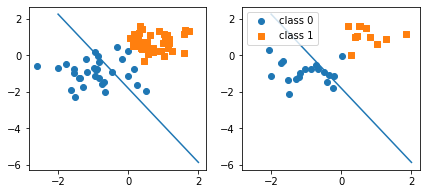

In [8]:
x_min = -2
y_min = ( -(w[0] * x_min) / w[1]
          -(b[0] / w[1]) )

x_max = 2
y_max = ( -(w[0] * x_max) / w[1]
          -(b[0] / w[1]) )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train[:, 0]==0, 0], X_train[y_train[:, 0]==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train[:, 0]==1, 0], X_train[y_train[:, 0]==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test[:, 0]==0, 0], X_test[y_test[:, 0]==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test[:, 0]==1, 0], X_test[y_test[:, 0]==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()